In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [32]:
# pip install yellowbrick 

## Read the dataset

In [33]:
data = pd.read_csv('Country-data.csv')

In [34]:
data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [35]:
# lETS SET COUNTRY AS INDEX
data.set_index('country',inplace=True)

In [36]:
data.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [37]:
print(f'No of rows: {data.shape[0]}')
print(f'No of columns: {data.shape[1]}')

No of rows: 167
No of columns: 9


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


## Descriptive statistics

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


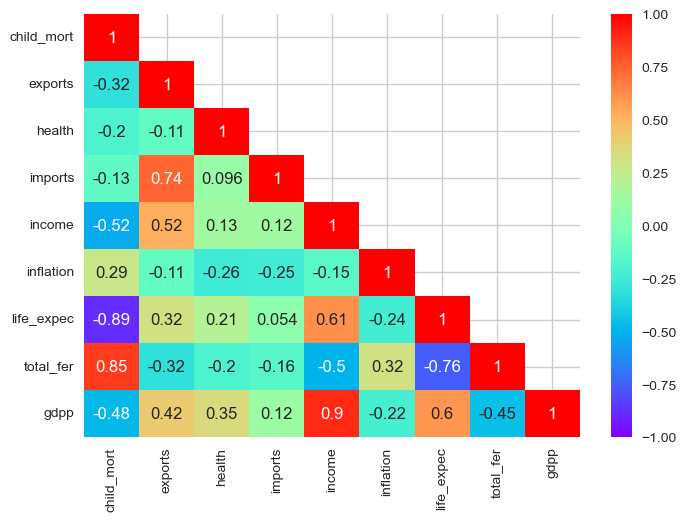

In [40]:
sns.heatmap(data.corr(),vmin=-1,annot=True,cmap='rainbow',mask=np.triu(data.corr(),k=1))
plt.show()

## Visualization

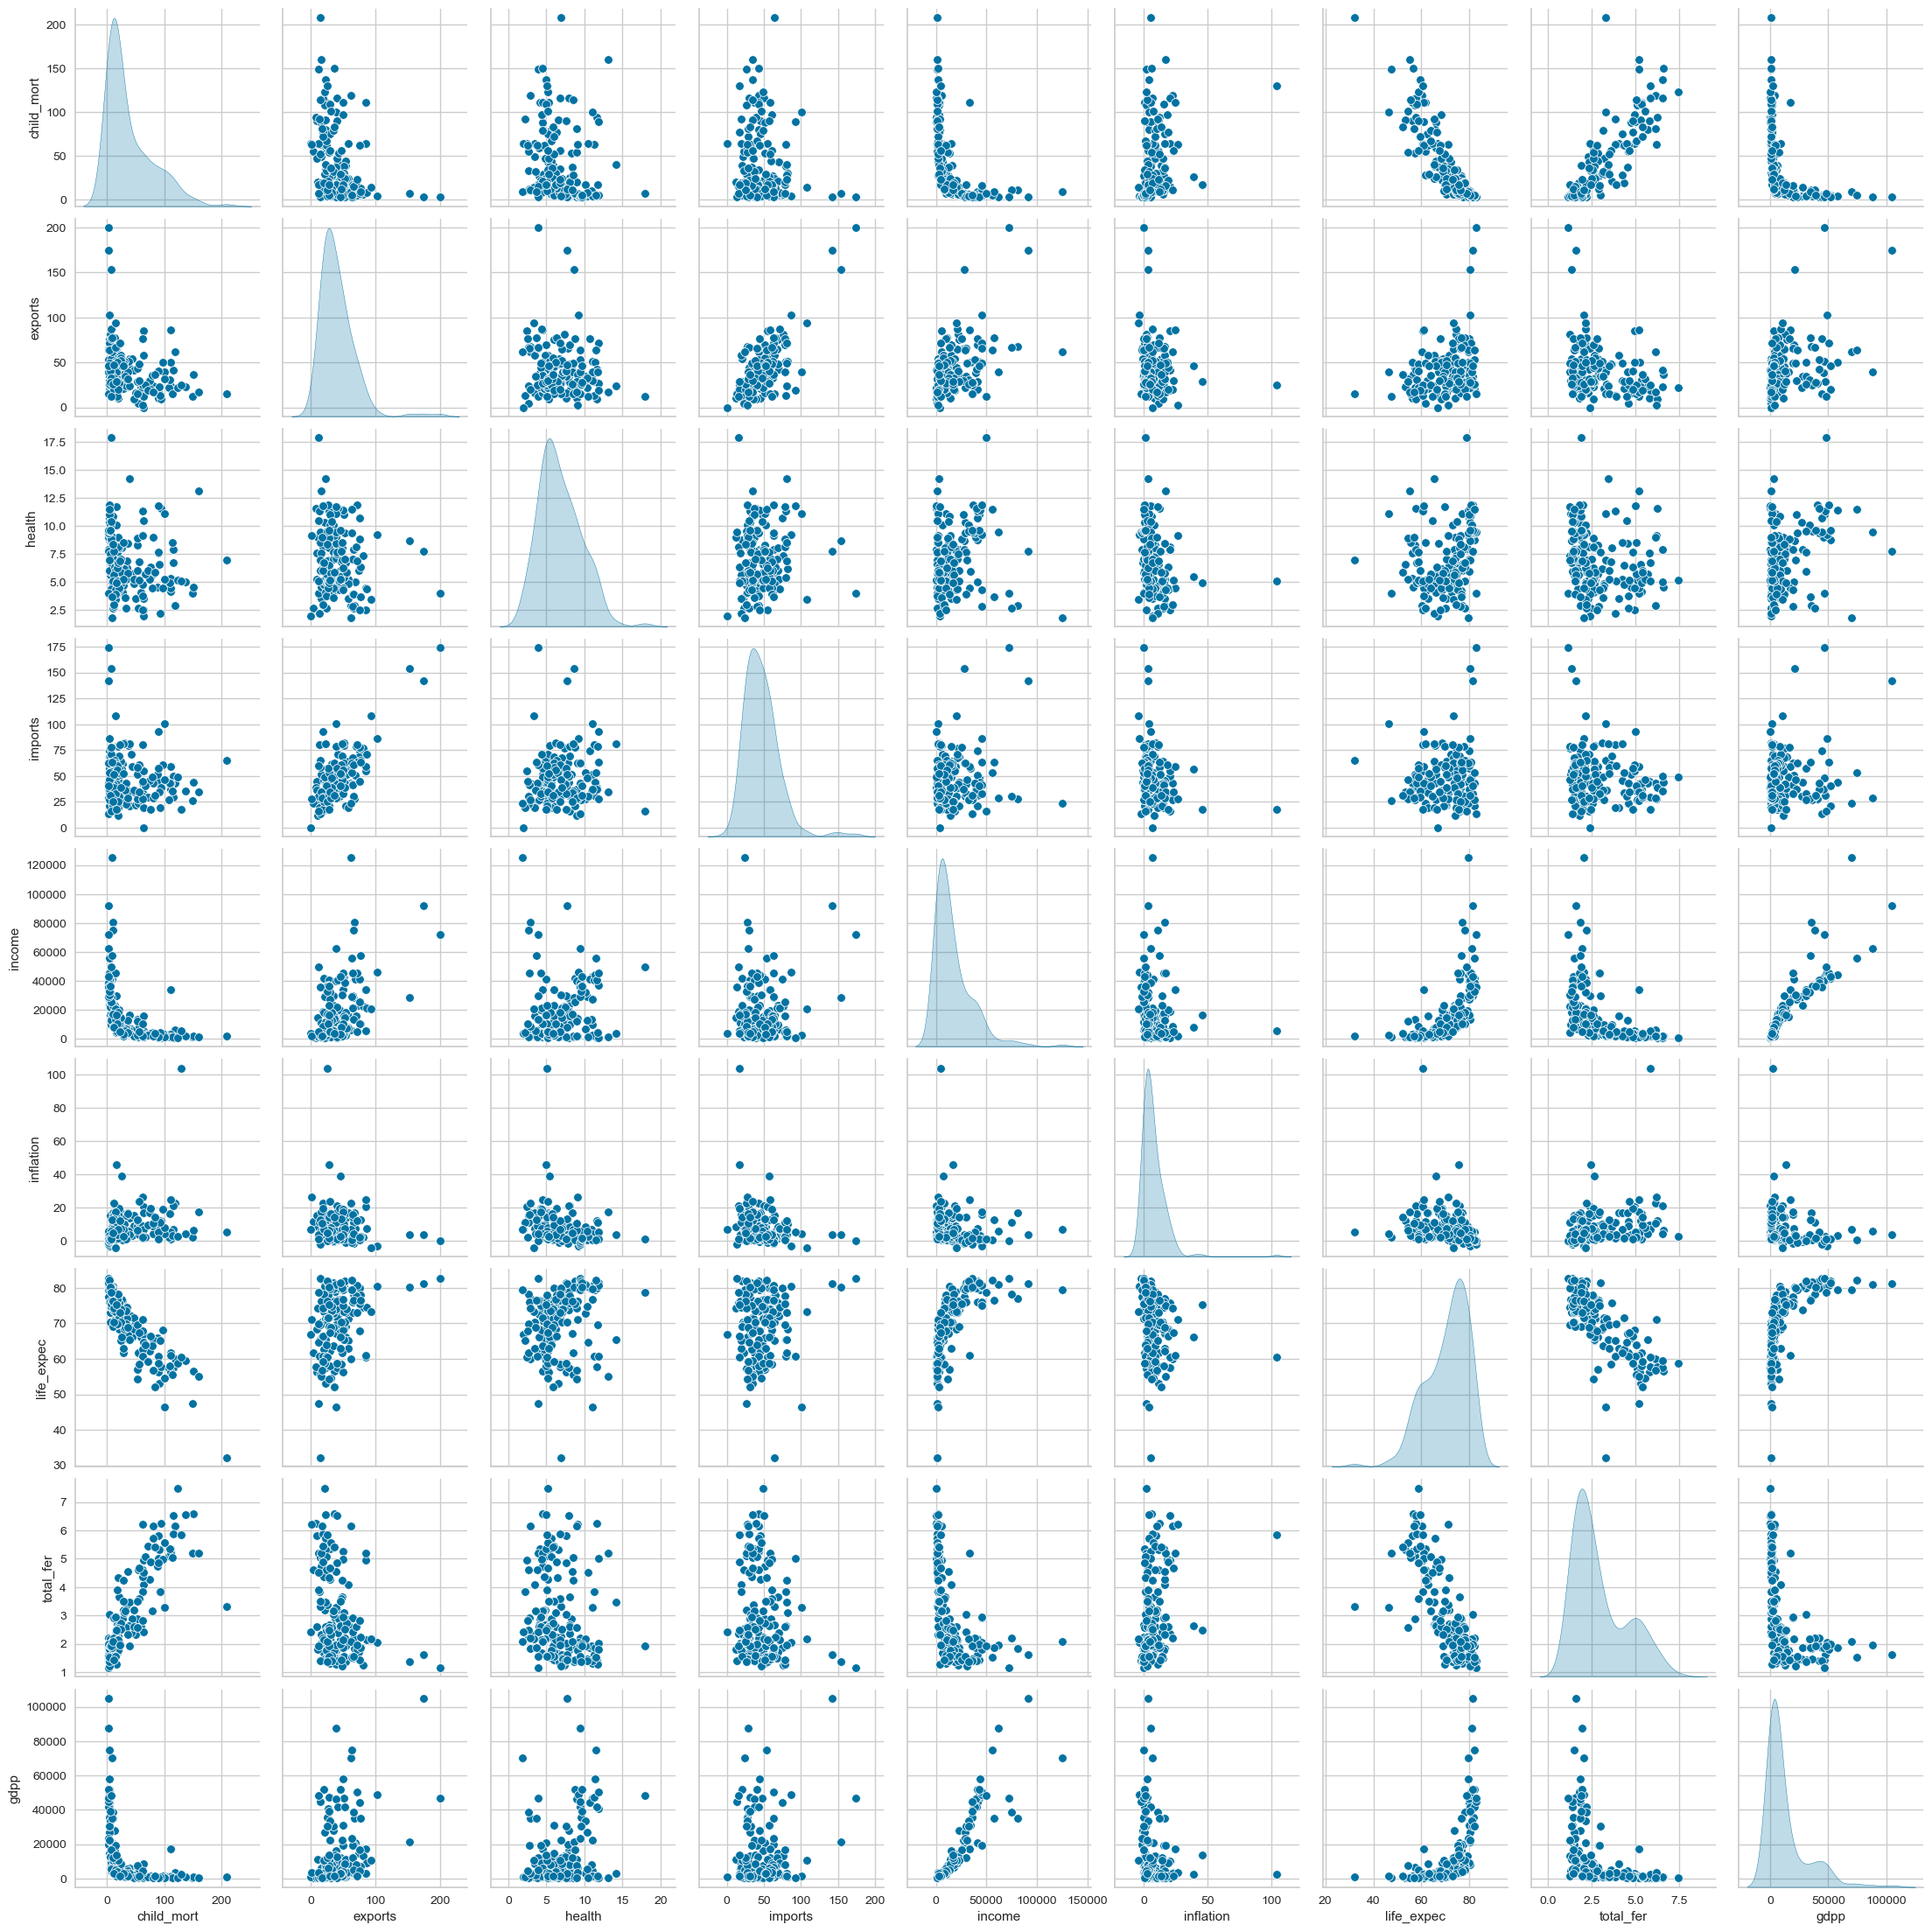

In [41]:
sns.pairplot(data=data,diag_kind='kde')
plt.show()

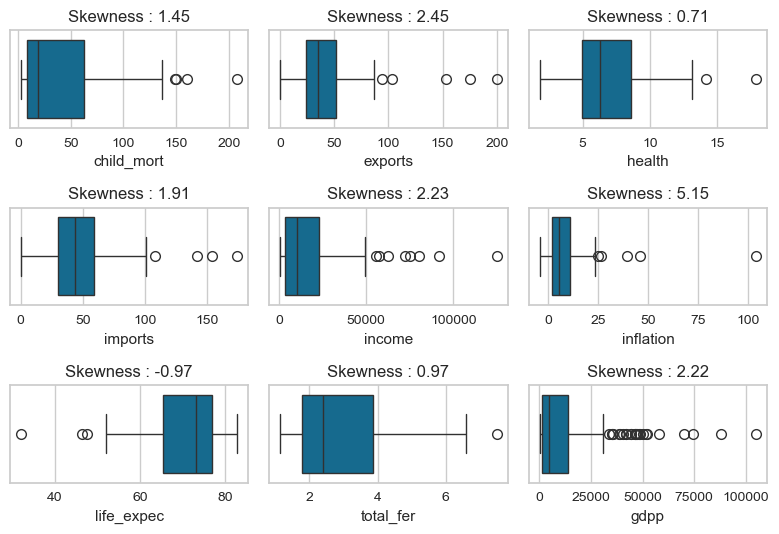

In [42]:
# Boxplot
t=1
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness : {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

## Data Preprocessing

In [43]:
# Check for missing
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [44]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [45]:
# treat the outliers
# lest cap the extreme outliers (2*IRQ)

for i in data.columns:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr = q3-q1
    ul,ll = q3+2*iqr,q1-2*iqr
    data[i] = data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

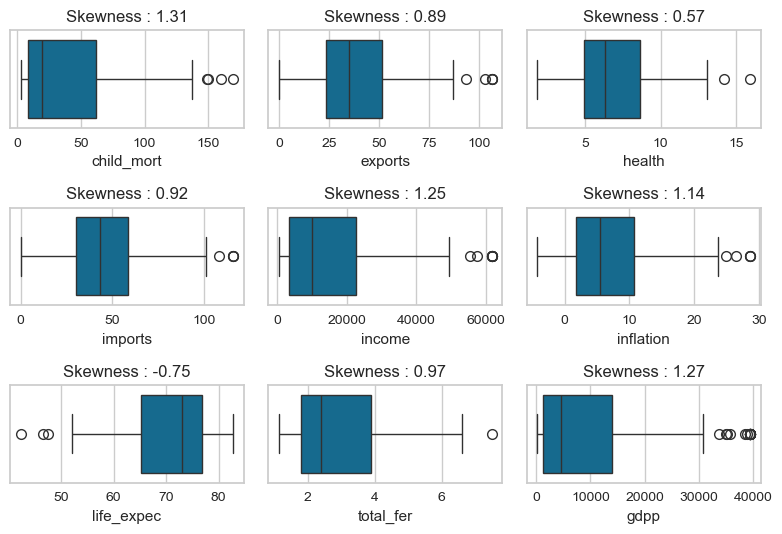

In [46]:
t=1
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness : {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [47]:
# Scale the data
sc = StandardScaler()
data_s = pd.DataFrame(sc.fit_transform(data),columns=data.columns)

In [48]:
data_s.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.325807,-1.350898,0.287879,-0.059395,-0.908259,0.327015,-1.669872,1.902882,-0.800533
1,-0.545011,-0.536547,-0.094264,0.115438,-0.394747,-0.384140,0.658280,-0.859973,-0.534220
2,-0.273031,-0.066034,-0.977272,-0.697302,-0.211439,1.283842,0.681446,-0.038404,-0.506362


## Reduce the datset using PCA

In [49]:
pca = PCA(n_components=9)

In [50]:
pca.fit(data_s)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",9
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

In [51]:
pca.explained_variance_ratio_

array([0.48163025, 0.16586924, 0.13639048, 0.09910154, 0.0655671 ,
       0.02171641, 0.0164242 , 0.0094028 , 0.00389797])

In [52]:
# Lets decide how many PC's we can use
pca.explained_variance_

array([4.36078478, 1.50181611, 1.23490898, 0.89728681, 0.59365874,
       0.1966251 , 0.14870828, 0.08513501, 0.03529306])

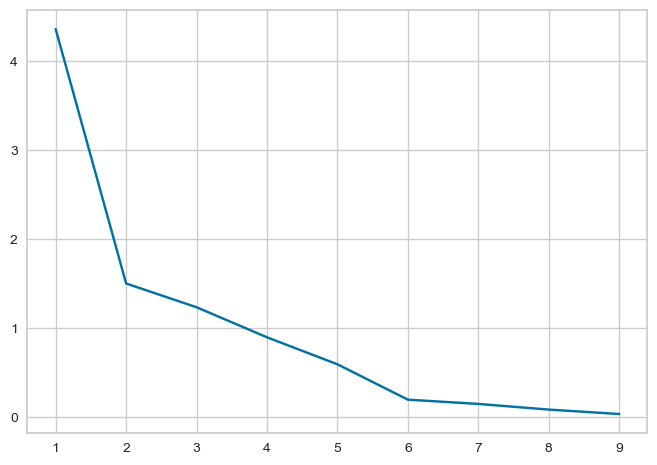

In [53]:
# Scree plot
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

In [54]:
# Explianed variance ration
np.cumsum(pca.explained_variance_ratio_)

array([0.48163025, 0.6474995 , 0.78388998, 0.88299152, 0.94855862,
       0.97027503, 0.98669923, 0.99610203, 1.        ])

In [55]:
pca_final = PCA(n_components=5)
pca_data = pd.DataFrame(pca_final.fit_transform(data_s),
                        columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)

In [56]:
pca_data.head(3)

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.099217,-0.232689,0.972447,0.787536,-0.009905
Albania,0.427427,-0.285346,0.242571,-1.377388,0.114011
Algeria,-0.411658,-0.526613,-1.634043,-0.613283,0.459962


## KMeans Clustring on PCA data

In [58]:
# Decide the value of k
kelbow = KElbowVisualizer(estimator=KMeans(random_state=0),k=10)

YellowbrickTypeError: The supplied model is not a clustering estimator; try a classifier or regression score visualizer instead!

In [ ]:
kelbow.fit(pca_data)
kelbow.show()

In [ ]:
t=1
plt.figure(figsize=(7,10))
for i in range(2,11):
    plt.subplot(5,2,t)
    model = KMeans(n_clusters=i,random_state=0)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(pca_data)
    plt.title(f'k={i}, Silhouette Score: {round(sil_viz.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
# Lets go with k=3

kmeans_model = KMeans(n_clusters=3,random_state=0)

In [ ]:
kmeans_model.fit(pca_data)

In [ ]:

pred = kmeans_model.predict(pca_data)
pca_data['labels'] = pred

In [ ]:
pca_data.head(3)

In [ ]:
data['labels'] = pred

In [ ]:
data.head(3)

## Visualize the clusters

In [ ]:
centroids  = kmeans_model.cluster_centers_
centroids

In [ ]:
sns.scatterplot(data=pca_data,x='PC1',y='PC2',hue='labels',palette=['blue','red','darkgreen'])
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='^',ms=12,color='k')
plt.show()

## Business Interpretation

In [ ]:
data.groupby(by='labels').mean()

In [ ]:
data['labels'] = data['labels'].map({0:'Developing',1:'Underdeveloped',2:'Developed'})

In [ ]:
data.head(3)

In [ ]:
# Developed Countries
data[data['labels']=='Developed'].index

In [ ]:
# Developing Countries
data[data['labels']=='Developing'].index

In [ ]:
# Underdeveloped Countries
data[data['labels']=='Underdeveloped'].index

In [ ]:
t = 1
plt.figure(figsize=(10,12))
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,y=i,x='labels',palette=['r','b','g'])
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
px.choropleth(data_frame=data,locationmode='country names',
             locations=data.index,color='labels',
              color_discrete_map={'Underdeveloped':'red',
                                 'Developed':'green','Developing':'blue'})

## Deployment

In [ ]:
import pickle

In [ ]:
# create a pickle of fitted model

with open('final_model.pkl','wb') as file:
    pickle.dump(kmeans_model,file)

In [ ]:
# create a pickle of standard scaler and pca

with open('scaler.pkl','wb') as file:
    pickle.dump(sc,file)

with open('pca.pkl','wb') as file:
    pickle.dump(pca_final,file)

In [ ]:
pca_data.head(2)

In [ ]:
kmeans_model.predict([[-3.099217,-0.232689,-0.972447,0.787536,-0.009905]])[0]